## AppStream Depracated Works

### Install Sleap on Windows

**Boto3:** This AWS SDK package for Python may be useful for users who would like to access AWS services. 

    pip install boto3

### Install S3FS on Windows

Install [MYSY2](https://www.msys2.org/) up till step 5, then follow the [official install instructions](https://github.com/s3fs-fuse/s3fs-fuse/blob/master/COMPILATION.md) in a MYSY2 console. 

- Skip installing libopenssl-devel (it wasn't available for me)
- When installing WinFSP, remember to choose the option to install the 'Developer' files.
- After tring to make files in step 6 and run `make install`, you may receive an error suggesting a missing line of code. Add that line of code into the designated file and rerun the `make install` command. 

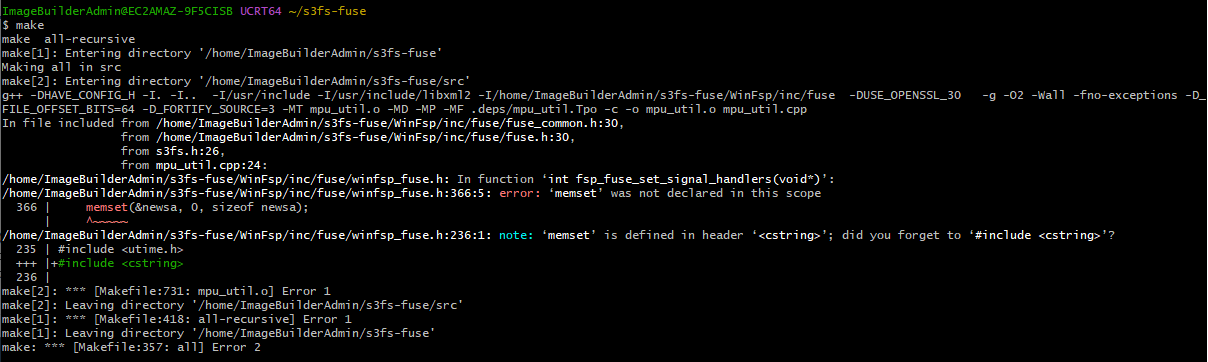

- Move executable file and DLL files into a bin directory as instructed

Now we can copy the contents of the bin directory to whichever directory we would like to have the users run the program in. For this demo, copy the bin directory content to `C:\s3fs\` as an Admin User, so that the contents will still be available to all users. 

### Depracated: Windows Image Builder Setup S3FS

**Issue: s3fs folder & s3-mount folder & .bash_profile all aren't available since they are under /Users**

Next, as a Template user, create a directory where all the S3 buckets will be mounted. Also link the s3fs program files to the home directory so it's easier to access. Lastly, create a `.bash_profile` that contains an alias for running the s3fs program. If the user would like to use other consoles such as the Windows command prompt, they may use the path to the `s3fs.exe` file to run the program directly. But if users use Git Bash, they would only need to type the alias `s3fs` in the command line to run the s3fs program. 

    cd $HOME
    ln -s /c/s3fs $HOME/s3fs-user
    touch .bash_profile
    vi .bashrc
    
    # In .bashrc
    alias test='echo "Hello world!"'
    alias s3fscmd='${HOME}/../../s3fs/s3fs.exe'
    alias s3fscmd-user='${HOME}/s3fs-user/s3fs.exe'
    
    # open another git bash window to generate .bash_profile
    

Finally, as a Test user, we are ready to mount an S3 bucket onto the instance. 

    s3fs aind-appstream-data-dev-0tvf3cjlng0m ./s3-mount -o passwd_file=.passwd-s3fs
    df -h

### Blocked: Windows User using S3FS

As a fleet instance user, since the s3fs files are available in the C drive, and mime.types is available at `:C\etc\mime.types`, run the following commands to run s3fs. 

    # Windows conda: iam role
    cd Users\PhotonUser
    ..\..\s3fs\s3fs.exe aind-appstream-data-dev-0tvf3cjlng0m .\s3-mount -o iam-role=appstream_data_bucket__role -o url="https://s3-us-west-2.amazonaws.com" -o endpoint=us-west-2 -o mime=..\..\etc\mime.types -o dbglevel=info -f -o curldbg
    # s3fs: could not determine how to establish security credentials.
    
    # Windows conda: password file
    cd Users\PhotonUser
    ..\..\s3fs\s3fs.exe aind-appstream-data-dev-0tvf3cjlng0m .\s3-mount -o passwd_file=.passwd-s3fs -o mime=..\..\etc\mime.types -o dbglevel=info -f -o curldbg
    # s3fs: credentials file .passwd-s3fs should not have others permissions.
    

    # Windows gitbash: iam role
    cd /c/Users/PhotonUser   
    /c/s3fs/s3fs.exe aind-appstream-data-dev-0tvf3cjlng0m \
    -o mime=/c/etc/mime.types \
    -o iam_role="appstream_data_bucket__role" \
    -o url="https://s3-us-west-2.amazonaws.com" \
    -o endpoint=us-west-2 \
    -o dbglevel=info -o curldbg \
    -o allow_other \
    ./s3-mount
    # s3fs: temporary directory doesn't exists.
    
    # Windows gitbash: password file
    cd /c/Users/PhotonUser   
    /c/s3fs/s3fs.exe aind-appstream-data-dev-0tvf3cjlng0m ./s3-mount \
    -o mime=/c/etc/mime.types \
    -o passwd_file=.passwd-s3fs \
    -o dbglevel=info -o curldbg \
    -o allow_other 
    # s3fs: credentials file .passwd-s3fs should not have others permissions.

Issue: Need to change passwd file permission as admin in windows: not sure how this works
    
    icacls .\.passwd-s3fs 
    icacls .\.passwd-s3fs /inheritance:r /grant:r "NT AUTHORITY\SYSTEM":(N) "BUILTIN\Administrators":(N) "EC2AMAZ-1PVRVIC\ImageBuilderAdmin":(F)

### Depracated: use Linux CLI to create image

    ```
    # create  chromeium-manifest.txt
    vi getfilestool.sh
    chmod u+x ~/getfilestool.sh
    ps -ef | grep chromium
    sudo ~/getfilestool.sh 16712 > /tmp/chromium-manifest.txt

    # Add apps via CLI
    AppStreamImageAssistant add-application \
    --name Chromium \
    --absolute-app-path /usr/lib64/chromium-browser/chromium-browser \
    --display-name Chromium \
    --absolute-icon-path /usr/share/icons/hicolor/256x256/apps/chromium-browser.png \
    --absolute-manifest-path /tmp/chromium-manifest.txt
    
    export AWS_PROFILE='appstream_machine_role'
    
    # create image
    AppStreamImageAssistant create-image \
    --name "Demo_Linux_Image_Chrome_Terminal_Conda"
    --description "Apps include Chrome, Terminal. Set AWS_PROFILE."
    ```
    
Optional steps after adding apps via CLI and before creating image:
- open chrome app, configure chrome shortcut, copy config to /etc/skel/profile.d
- [create test user](https://docs.aws.amazon.com/appstream2/latest/developerguide/tutorial-create-linux-image.html#tutorial-linux-image-test-applications), open chrome from CL, check chrome shortcut is configured, echo AWS_PROFILE

## *Linux Install DLC (in progress)* 
Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found

conda env create -f DEEPLABCUT.yaml
conda install -c conda-forge cudatoolkit
conda install -c conda-forge cudnn
conda install -c nvidia cuda-nvcc

cd examples
python testscripts.py

qt.qpa.plugin: Could not find the Qt platform plugin "windows" in ""
This application failed to start because no Qt platform plugin could be initialized. Reinstalling the application may fix this problem.


    # Create ~/dlc.yaml with contents:
    
    name: DEEPLABCUT
    channels:
        - conda-forge
        - defaults
    dependencies:
        - python=3.8
        - pip
        - ipython
        - jupyter
        - nb_conda
        - ffmpeg
        - cudatoolkit
        - cudnn
        # Packages required by tensorflow to find/use GPUs
        - conda-forge::cudatoolkit ==11.3.1
        # "==" results in package not found
        - conda-forge::cudnn=8.2.1
        - nvidia::cuda-nvcc=11.3

        - pip:
            - "deeplabcut[gui,tf]"
        
    
    # Create ~/dlc.yaml with contents: 
    name: DEEPLABCUT
    channels:
        - conda-forge
        - defaults
    dependencies:
        - python=3.9
        - pip
        - ipython
        - jupyter
        - nb_conda
        - ffmpeg
        - cudnn
        - conda-forge::cudatoolkit=11.8.0
        - pip:
          - "deeplabcut[gui]"
          - nvidia-cudnn-cu11==8.6.0.163
          - tensorflow==2.10.*
            
    # install DLC environment
    sudo $CONDA_EXE env create -f dlc.yaml
    
    # test DLC works
    conda activate DEEPLABCUT
    python -c "import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))"
    
    # Experiment w cuda installation
    sudo /opt/miniconda3/bin/conda create --name tf python=3.9
    conda activate tf
    sudo /opt/miniconda3/bin/conda install -c conda-forge cudatoolkit=11.8.0 -p $CONDA_PREFIX
    sudo /opt/miniconda3/bin/conda install pip -p $CONDA_PREFIX
    sudo /opt/miniconda3/bin/pip install nvidia-cudnn-cu11==8.6.0.163
    
    python -c "import nvidia.cudnn;print(nvidia.cudnn.__file__)"
    # Could not find libcudart.so.11.0 error: add $CONDA_PREFIX/lib to PATH
    export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:/$CONDA_PREFIX/lib
    
    # conda list gives error abt typing_extensions
    sudo rm typing_extensions-4.7.1-pyha770c72_0.json 
    
    # Finalize cuda installation
    sudo /opt/miniconda3/bin/conda env create -f dlc.yaml
    conda activate DEEPLABCUT4
    echo 'CUDNN_PATH=$(dirname $(python -c "import nvidia.cudnn;print(nvidia.cudnn.__file__)"))' | sudo tee -a $CONDA_PREFIX/etc/conda/activate.d/env_vars.sh
    echo 'export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:$CONDA_PREFIX/lib/:$CUDNN_PATH/lib' | sudo tee -a $CONDA_PREFIX/etc/conda/activate.d/env_vars.sh
    
    python -c "import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))"
    python -m deeplabcut
    
Computer statistics: 

tensorflow-2.8.0	3.7-3.10	GCC 7.3.1	Bazel 4.2.1	cudnn 8.1	cuda 11.2
cuDNN 8.9.2 for CUDA 12.0 or 12.1 (>=525.60.13, compute compatibilty 7.5 )

Driver 525.105,Needs Cuda >=12.0, needs CUDNN 8.8.1 / 8.9.2

    Kernel version: 4.14.314-238.539.amzn2.x86_64
    Linux version 4.14.314-238.539.amzn2.x86_64 (mockbuild@ip-10-0-47-46) (gcc version 7.3.1 20180712 (Red Hat 7.3.1-15) (GCC)) #1 SMP Tue May 23 16:44:05 UTC 2023
    Glibc: ldd (GNU libc) 2.26
    Compute Compatibility: 7.5
    OS version: 2
    NAME="Amazon Linux"
    VERSION="2"
    ID="amzn"
    ID_LIKE="centos *7* rhel fedora"
    VERSION_ID="2"
    PRETTY_NAME="Amazon Linux 2"
    ANSI_COLOR="0;33"
    CPE_NAME="cpe:2.3:o:amazon:amazon_linux:2"
    HOME_URL="https://amazonlinux.com/"


    # As admin

    conda install -c "nvidia/label/cuda-12.2.0" cuda-toolkit
    # nvcc -V works
    conda install cudnn=8.8
    conda install pip
    pip install tensorflow (installed 2.13)
    conda install -c conda-forge cudatoolkit=11.8.0
    conda install -c conda-forge cudnn=8.8
    

### Linux User Instruction

#### Launch DLC GUI (in progress)

    conda activate DEEPLABCUT
    python -m deeplabcut


### Depracated: Linux S3FS

As Admin User

    # install s3fs:
    sudo amazon-linux-extras install epel -y && sudo yum install s3fs-fuse -y
    
As Template User
    
    # create password file
    vi .password-s3fs
    chmod 600 .password-s3fs
    
    # Content in ~/mountbucket.sh
    #!/bin/bash
    export CMD="/usr/local/appstream/credentials-provider/AppStreamRoleCredentialProvider"
    export role="Machine"

    export output=$("$CMD" --role="$role")

    export access_key=$(echo "$output" | jq -r '.AccessKeyId')
    export secret_key=$(echo "$output" | jq -r '.SecretAccessKey')
    export session_token=$(echo "$output" | jq -r '.SessionToken')

    export AWS_ACCESS_KEY_ID=$access_key
    export AWS_SECRET_ACCESS_KEY=$secret_key

    echo $AWS_ACCESS_KEY_ID:$AWS_SECRET_ACCESS_KEY > ${HOME}/.passwd-s3fs-auto-appstream
    chmod 600 ${HOME}/.passwd-s3fs-appstream

    mkdir ${HOME}/s3-mount
    mkdir ${HOME}/s3-mount-appstream
    mkdir ${HOME}/s3-mount-bash
    mkdir ${HOME}/s3-mount-bash-appstream

    s3fs aind-appstream-data-dev-temporary  ${HOME}/s3-mount -o passwd_file=${HOME}/.password-s3fs
    s3fs aind-appstream-data-dev-temporary  ${HOME}/s3-mount-appstream -o passwd_file=${HOME}/.password-s3fs-appstream
     
    # Test appstream has access to bucket
    # aws s3 ls s3://aind-appstream-data-dev-temporary --profile=appstream_machine_role
    
    # Content in ~/.bashrc
    s3fs aind-appstream-data-dev-temporary  ${HOME}/s3-mount-bash -o passwd_file=${HOME}/.password-s3fs
    s3fs aind-appstream-data-dev-temporary  ${HOME}/s3-mount-bash-appstream -o passwd_file=${HOME}/.password-s3fs-appstream

    # Content in /appstream/SessionScripts/config
        {
      "SessionStart": {
        "executables": [
          {
            "context": "user",
            "filename": "/etc/skel/mountbucket.sh",
            "arguments": "",
            "s3LogEnabled": false
          }
        ],
        "waitingTime": 30
      },

Copy Template User files to /etc/skel. Launch fleet users, only s3-mount and s3-mount-bash worked. Conclusion: using session scripts to mount buckets on start up worked, but retrieving credentials from AppStream credential provider failed (s3fs couldn't read the password file). 

**Depracated: User Mount S3 Bucket instructions**   

You may optionally run the AWS CLI command `aws s3 ls s3://aind-appstream-data-dev-0tvf3cjlng0m` to see the contents of the S3 Bucket. 
    
    cd $HOME 
    mkdir s3-mount
    
    # Linux user: password file
    s3fs aind-appstream-data-dev-temporary  s3-mount \
    -o passwd_file=.password-s3fs 
    # successful!
    
    # Linux user: assumed role
    s3fs aind-appstream-data-dev-0tvf3cjlng0m s3-mount \
    -o iam_role="appstream_data_bucket__role" \
    -o url="https://s3-us-west-2.amazonaws.com" \
    -o endpoint=us-west-2 \
    -o dbglevel=info -o curldbg \
    -o allow_other \
    # no erros, but no result